# Содержание:<br>
Шаг 1. Подготовка данных<br>
Шаг 2. Приоритизация гипотез<br>
Шаг 3. Анализ A/B-теста<br>
Шаг 4. Общие выводы<br>

# Описание исследования:
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# План исследования:
Шаг 1. Подготовить данные
- импортировать необходимые библиотеки
- ознакомиться с файлами, с которыми предстоит работать
- изменить форматы данных, если это необходимо
- проверить данные на дубликаты
- привести название колонок к единому стилю
- сделать промежуточный вывод по данным

Шаг 2. Осуществить приоритизацию гипотез
- применить фреймворк ICE для приоритизации гипотез
- применить фреймворк RICE для приоритизации гипотез
- объяснить изменение приоритизации во время применения различных фреймворков
- сделать промежуточные выводы

Шаг 3. Провести анализ A/B-теста
1. График кумулятивной выручки по группам
2. График кумулятивного среднего чека по группам
3. График относительного изменения кумулятивного среднего чека группы В к группе А
4. График кумулятивной конверсии по группам
5. График относительного изменения кумулятивной конверсии группы B к группе A 
6. Точечный график количества заказов по пользователям
7. 95-й и 99-й перцентили количества заказов по пользователям
8. Точечный график стоимостей заказов (+ гисторграмма, для наглядности)
9. 95-й и 99-й перцентили стоимости заказов
10. Подсчитать статистическую значимость различий в конверсии между группами по «сырым» данным.
11. Рассчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12. Подсчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
13. Рассчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
14. Принять  решение по результатам теста и объяснить его.

*По каждому из пунктов, сделать выводы и подготовить предложения

Подготовить промежуточные выводы по данным

Шаг 4. Сформулировать общие выводы

# Описание данных:

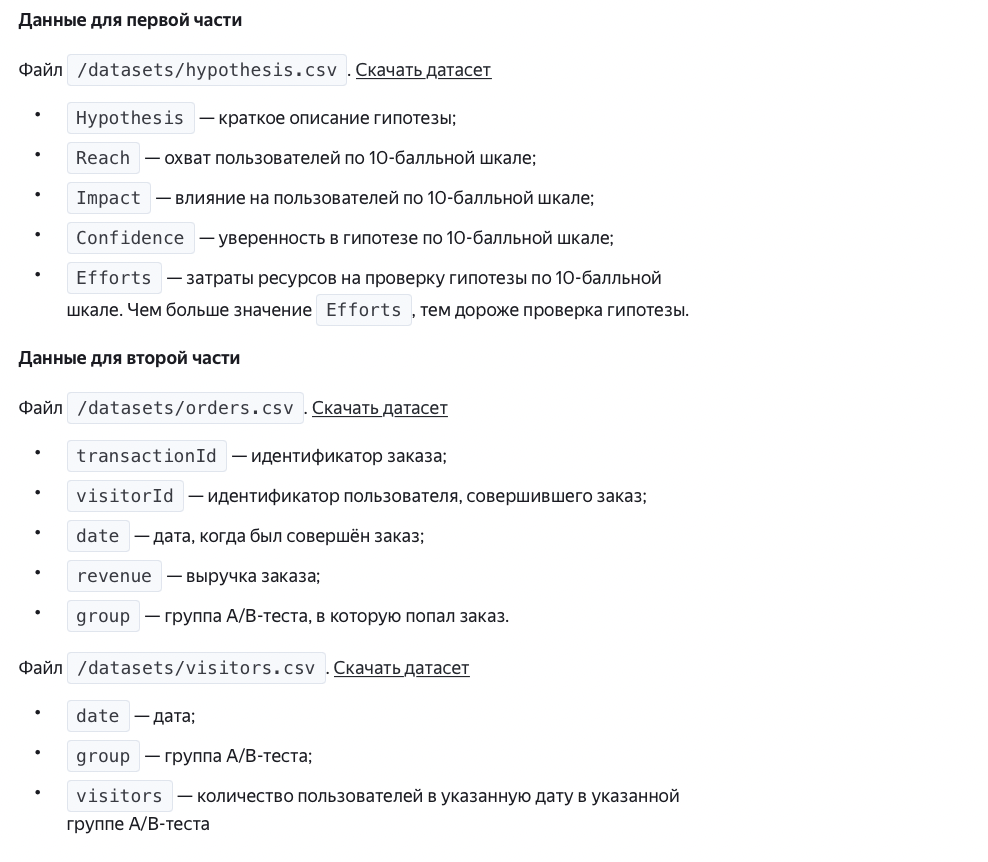

# Шаг 1. Подготовка данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import datetime as dt
from matplotlib.pyplot import figure

import scipy.stats as stats

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
orders.duplicated().sum()

0

In [9]:
visitors.duplicated().sum()

0

In [10]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'transactionid':'transaction_id','visitorid':'visitor_id'})

In [12]:
orders['date'] = pd.to_datetime(orders['date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


### Промежуточные выводы

Мы ознакомились с данными из трёх документов: 'hypothesis.csv’, 'orders.csv’, 'visitors.csv’. В документе 'hypothesis.csv’ девять гипотез, для каждой из которых указан охват пользователей, влияние на пользователей, уверенность в гипотезе, затраты ресурсов на проверку гипотезы (параметры указаны по 10-балльной шкале). В документе ‘orders.csv’ указан уникальный номер транзакции, уникальный идентификатор пользователя, дата совершения транзакции, полученная выручка, группа, к который относится пользователь (в соответсвии с A/B-тестом). В документе 'visitors.csv’ указано общее количество посетителей с разбивкой по дням и группам исследования (в соответсвии с A/B-тестом). Во время подготовки данных мы выяснили, что в данных нет пропусков, дубликаты отсутствуют, привели названия столбцов к единому стилю, изменили формат данных, где это было необходимо. 

 **Данные готовы для дальнейшей работы.**

# Шаг 2. Приоритизация гипотез

### Применяю фреймворк ICE для приоритизация гипотез, сортирую их по убыванию приоритета

In [13]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применяю фреймворк RICE для приоритизации гипотез, сортирую их по убыванию приоритета

In [14]:
hypothesis['RICE']=(hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Объясняю изменение приоритизации гипотез при применении RICE в отличии от ICE

Приоритизация гипотез изменилась из-за того, что при использовании фреймворка различных фреймворков используются различные параметры. Метод ICE учитывает такие параметры, как: влияние, уверенность и легкость реализации, в то время как метод RICE включает в себя такие метрики, как: охват, влияние, достоверность, усилия.  Опять же, нужно понимать, что метрики оцениваемые по 10-бальной шкале задаются довольно субъективным образом и всё же это помогает при выборе наиболее оптимальных гипотез. 

### Промежуточные выводы

Во время приоритизации гипотез мы воспользовались двумя фреймворками: ICE, RICE. <br> Наиболее привлекательными для проверки гипотезами оказались:<br>
- Запустить акцию, дающую скидку на товар в день рождения (наиболее высокий ICE: 16.2)<br>
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок<br>
(Наиболее высокий RICE: 112)<br>

# Шаг 3. Анализ A/B-теста

In [15]:
display("В нашем тесте есть две группы:", orders['group'].unique())

display("Дата начала теста", orders['date'].min())
display("Дата окончания теста", orders['date'].max())

display('Пользователей в группе А', visitors[visitors['group']=='A']['visitors'].sum())
display('Пользователей в группе В', visitors[visitors['group']=='B']['visitors'].sum())

'В нашем тесте есть две группы:'

array(['B', 'A'], dtype=object)

'Дата начала теста'

Timestamp('2019-08-01 00:00:00')

'Дата окончания теста'

Timestamp('2019-08-31 00:00:00')

'Пользователей в группе А'

18736

'Пользователей в группе В'

18916

### 1. Строю график кумулятивной выручки по группам, делаю выводы, формулирую предложения

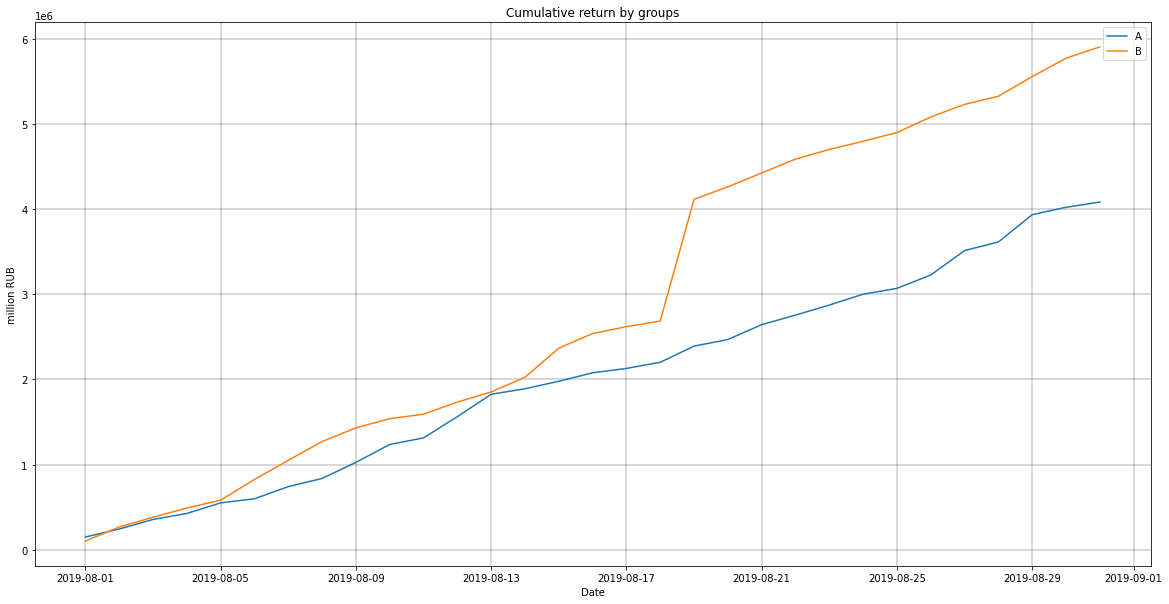

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    '',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)

plt.title('Cumulative return by groups')
plt.xlabel('Date')
plt.ylabel('million RUB')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 

Из графика заметно, что кумулятивная выручка в группе В выше. Также, по какой-то причине она резко возросла относительно пользователей из группы А в середине августа. Думаю, что это связано с “выбросом”, который произошёл 19 августа, когда был совершён наиболее дорогой заказ на 1294500 рублей.

### 2. Строю график кумулятивного среднего чека по группам, делаю выводы, формулирую предложения

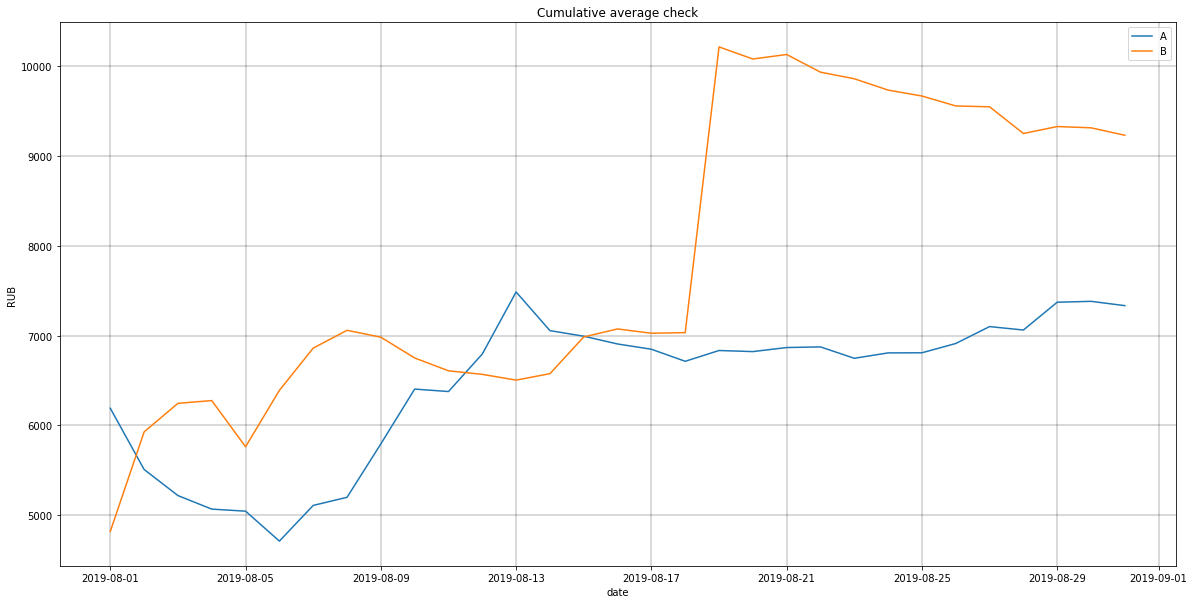

In [17]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('Cumulative average check')
plt.xlabel('date')
plt.ylabel('RUB')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

Средний чек в группе В немного выше, и опять же, выброс 19 августа повлиял на общую статистику.

### 3. Строю график относительного изменения кумулятивного среднего чека группы B  к группе A, подготавливаю выводы, делаю предложения

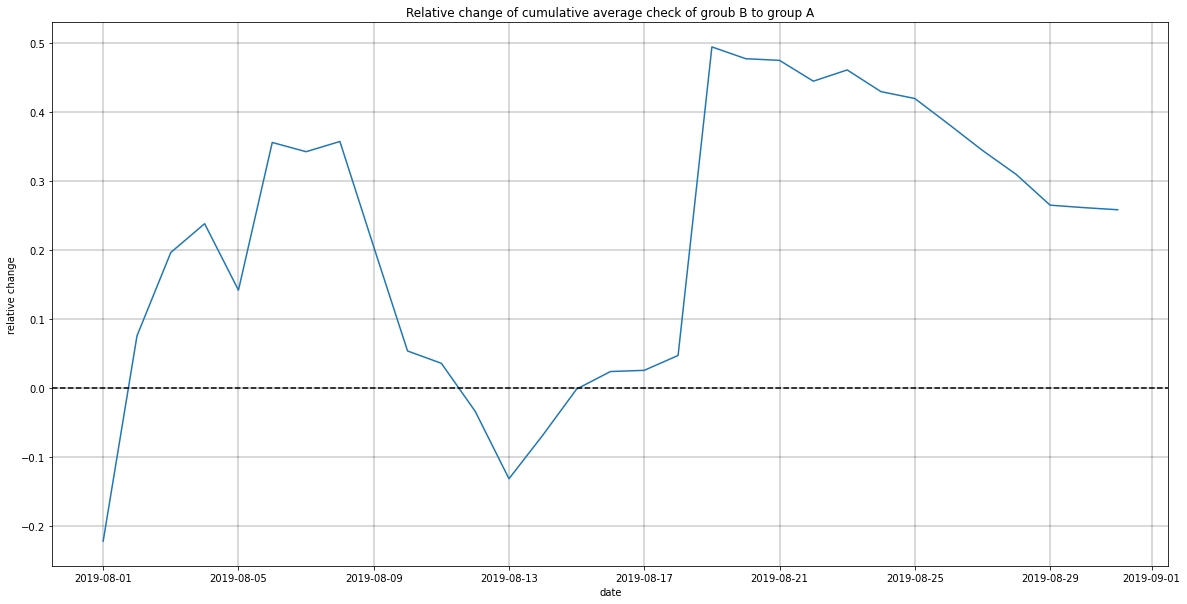

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('Relative change of cumulative average check of groub B to group A')
plt.xlabel('date')
plt.ylabel('relative change')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

Средний чек в группе В резко возрастал относительно группы А несколько раз в августе. Возможно, это связано с выбросами.

### 4. График кумулятивной конверсии по группам

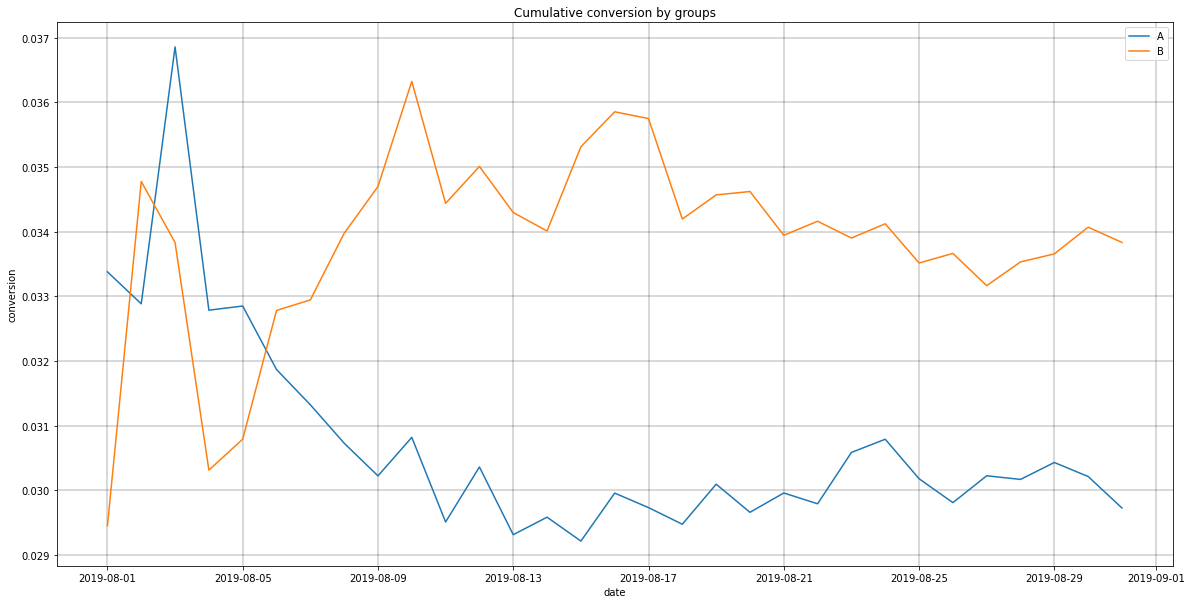

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('Cumulative conversion by groups')
plt.xlabel('date')
plt.ylabel('conversion')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
# plt.axis([dt.datetime(2019, 3, 10), dt.datetime(2019, 4, 23), 0, 0.05])

Кумулятивная конверсия пользователей стабильно выше в группе В.

### 5. График относительного изменения кумулятивной конверсии группы B к группе A

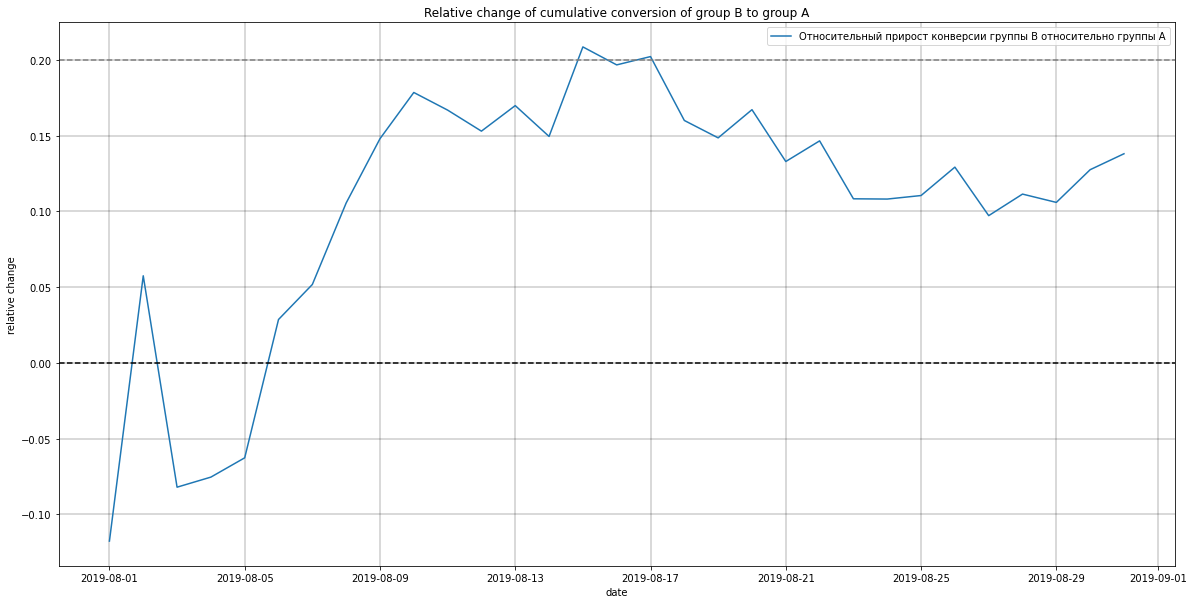

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('Relative change of cumulative conversion of group B to group A')
plt.xlabel('date')
plt.ylabel('relative change')

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
#plt.axis(["2019-03-10", '2019-04-23', -0.5, 0.5])

Относительное изменение кумулятивной конверсии говорит нам о том, что пользователи из группы В показывают более активное поведение и готовы тратить больше денег на продукты компании.

### 6. Строю точечный график количества заказов по пользователям

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


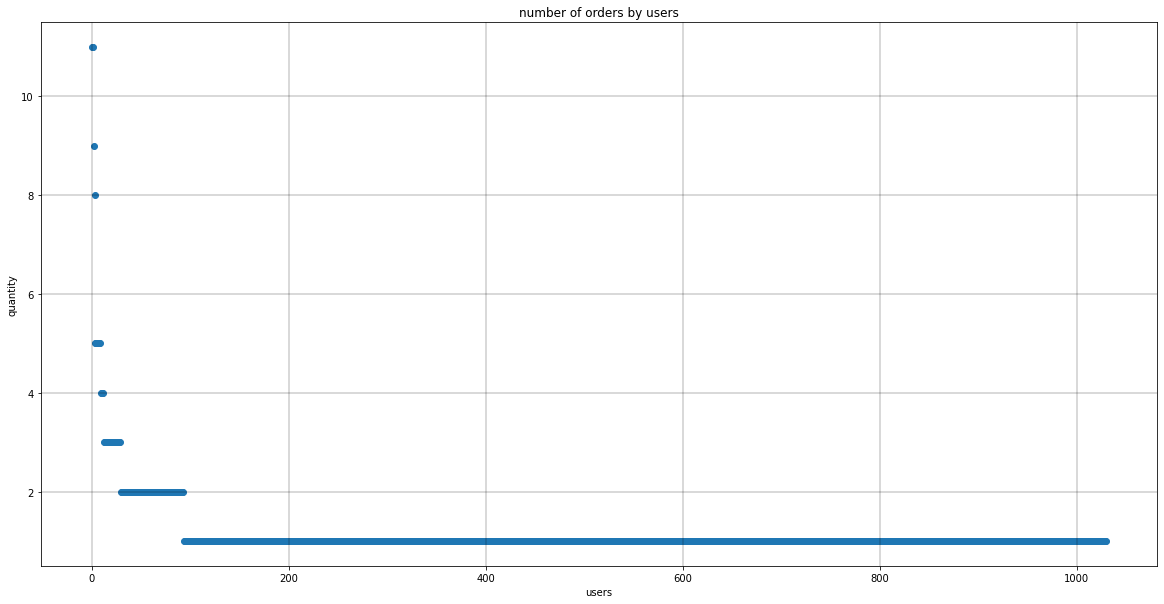

In [21]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
).sort_values(by='transaction_id', ascending=False)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('number of orders by users')
plt.xlabel('users')
plt.ylabel('quantity')

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 

Немного изменил код, который был в тренажере, чтобы данные были более наглядными (.sort_values(by='transaction_id', ascending=False))

Подавляющее большинство клиентов делают один заказ, есть клиенты которые делают два заказа. 3 и более заказов от одного пользователя можно считать большой редкостью. 

### 7. Подсчитывая 95-й и 99-й перцентили количества заказов на пользователя, выбираю границу для определения аномальных пользователей.

In [22]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'orders']

#print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Более 2 заказов совершают только 5 процентов пользователей, и лишь 1 процет пользователей делают 4 и более заказов.

Нужно обратить большее внимание на клиентоориентированность и сделать так, чтобы пользователи возвращались на платформу и совершали покупки.

### 8. Строю точечный график стоимостей заказов (+ гисторграмма, для наглядности)

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


(array([328., 247., 131.,  88.,  71.,  35.,  42.,  34.,  22.,  17.,  18.,
         17.,  27.,  25.,  10.,   3.,   3.,   7.,   6.,   6.,   4.,   6.,
          4.,   5.,   4.,   3.,   2.,   1.,   2.,   2.,   1.,   2.,   2.,
          0.,   0.,   1.,   0.,   3.,   3.,   0.,   1.,   3.,   0.,   1.,
          0.,   0.,   1.,   1.,   1.,   0.]),
 array([    0.,  1400.,  2800.,  4200.,  5600.,  7000.,  8400.,  9800.,
        11200., 12600., 14000., 15400., 16800., 18200., 19600., 21000.,
        22400., 23800., 25200., 26600., 28000., 29400., 30800., 32200.,
        33600., 35000., 36400., 37800., 39200., 40600., 42000., 43400.,
        44800., 46200., 47600., 49000., 50400., 51800., 53200., 54600.,
        56000., 57400., 58800., 60200., 61600., 63000., 64400., 65800.,
        67200., 68600., 70000.]),
 <BarContainer object of 50 artists>)

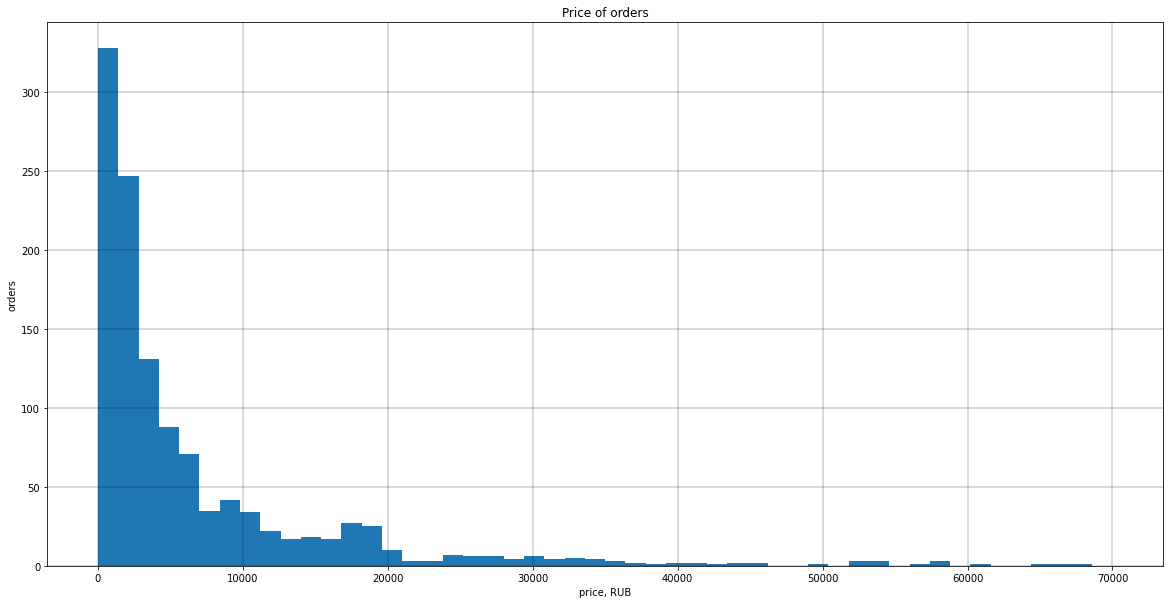

In [23]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('Price of orders')
plt.xlabel('price, RUB')
plt.ylabel('orders')

plt.hist(orders['revenue'], range=(0,70000), bins = 50)

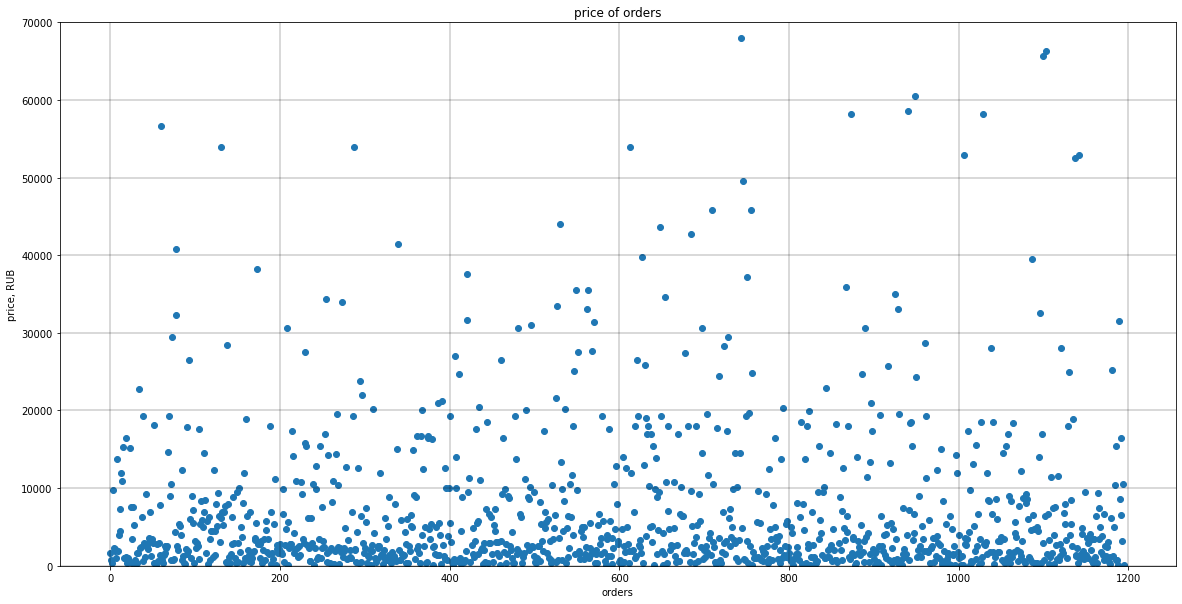

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))

figure(figsize=(20, 10))
plt.grid(color='black', linestyle='-', linewidth=0.3)
plt.title('price of orders')
plt.xlabel('orders')
plt.ylabel('price, RUB')

plt.ylim(0, 70000)

plt.scatter(x_values, orders['revenue']) 

Подавляющее количество пользователей совершают заказы на сумму менее 5 тысяч рублей. Заказы на сумму более 20т.р. можно считать редкими. Я ограничил максимальную стоимость во время построения графиков 70000тр, так как лишь 7 заказов было совершено на большую сумму.

Нужно повышать доверие пользователей к платформе. В таком случае они будут готовы делать более дорогостоящие покупки (легкость возврата товара, быстрая обратная связь, гарантии, спецпредложения и скидки)

### 9. Подсчитываю 95-й и 99-й перцентили стоимости заказов, выбираю границу для определения аномальных заказов.

In [25]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Лишь 5 процентов пользователей совершают заказы на сумму более 28тр, и лишь 1 процент пользователей сделали покупку на сумму 58233 рубля и более.

### 10. Подсчитываю статистическую значимость различий в конверсии между группами по «сырым» данным. 

In [26]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(
   lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
#print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("p-value: ", "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Difference between groups A and B: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value:  0.01679
Difference between groups A and B:  0.138


H0: По «сырым» данным различий в конверсии между группами A и B нет (Различия отсутствуют).
<br>H1: По «сырым» данным есть различия в конверсии между группами A и B.
<br>
Первое число — p-value = 0.01679 меньше 0.05. Значит, мы отвергаем нулевую гипотезу . Таким образом, мы принимаем альтернативную гипотезу: H1: По «сырым» данным **есть различия в конверсии между группами A и B.**
<br>
Относительный выйгрыш группы B равен 13.8%.

### 11. Рассчитываю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

In [27]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

print("p-value: ",'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Difference between groups A and B: ','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value:  0.729
Difference between groups A and B:  0.259


По «сырым» данным различий в среднем числе заказов групп A и B нет.
Первое число — p-value = 0.729 больше 0.05, следовательно между группами нет статистически значимого различия по среднему чеку по "сырым" данным, несмотря на относительную разницу почти в 26%

### 12. Подсчитываю статистическую значимость различий в конверсии между группами по «очищенным» данным. 

In [28]:
order_price_99 = np.percentile(orders['revenue'], 99)
number_of_orders_99 = np.percentile(ordersByUsers['orders'], 99)

print("price of orders, the 99th percentile: ", order_price_99)
print("number of orders, the 99th percentile: ", number_of_orders_99)

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= number_of_orders_99]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] >= number_of_orders_99]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > order_price_99]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print("number of abnormal users: ", abnormalUsers.shape[0])

price of orders, the 99th percentile:  58233.19999999999
number of orders, the 99th percentile:  4.0
number of abnormal users:  20


Мы видим 20 пользователей, которые совершили 4 и более заказов (99-й перцентиль) или сделали заказ на сумму 58тр и более (99-й перцентиль). Данное пользовательское поведение в дальнейшем будем считать аномальным. 

In [29]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01390
0.151


H0: По «очищенным» данным различий в конверсии между группами A и B нет (Различия отсутствуют). <br>
H1: По «очищенным» данным есть различия в конверсии между группами A и B.<br>

<br>Первое число — p-value = 0.01390 меньше 0.05. Значит, мы отвергаем нулевую гипотезу . <br>Таким образом, мы принимаем альтернативную гипотезу: H1: По «очищенным» данным есть различия в конверсии между группами A и B.
<br>Относительный выйгрыш группы B равен 15.1%.


### 13. Рассчитываю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [30]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.959
-0.014


По «очищенным» данным различий в среднем числе заказов групп A и B нет.
Первое число — p-value = 0.959 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы не отвергаем. Относительный проигрыш группы B равен 1.4%.

### 14. Принимаю решение по результатам теста и объясняю его. 

Варианты решений: <br>1. Остановить тест, зафиксировать победу одной из групп. <br>2. Остановить тест, зафиксировать отсутствие различий между группами. <br>3. Продолжить тест.<br>


- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий, опять же, нет статистически значимого различия по среднему чеку между группами. 
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, а именно имеют тенденцию к росту.

Думаю, что стоит остановить тест, признать его успешным и зафиксировать победу группы В.

# Шаг 4. Общие выводы

Во время подготовки данных мы ознакомились с данными из трёх документов: 'hypothesis.csv’, 'orders.csv’, 'visitors.csv’. В документе 'hypothesis.csv’ девять гипотез, для каждой из которых указан охват пользователей, влияние на пользователей, уверенность в гипотезе, затраты ресурсов на проверку гипотезы (параметры указаны по 10-балльной шкале). В документе ‘orders.csv’ указан уникальный номер транзакции, уникальный идентификатор пользователя, дата совершения транзакции, полученная выручка, группа, к который относится пользователь (в соответсвии с A/B-тестом). В документе 'visitors.csv’ указано общее количество посетителей с разбивкой по дням и группам исследования (в соответсвии с A/B-тестом). Мы выяснили, что в данных нет пропусков, дубликаты отсутствуют, привели названия столбцов к единому стилю, изменили формат данных, где это было необходимо. Данные были подготовлены для дальнейшей работы.

Во время приоритизации гипотез мы воспользовались двумя фреймворками: ICE, RICE. 

**Наиболее привлекательными для проверки гипотезами оказались:**
- Запустить акцию, дающую скидку на товар в день рождения (наиболее высокий ICE: 16.2)
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
(Наиболее высокий RICE: 112)

После этого мы перешли к анализу A/B-теста:

На подготовительном этапе мы:
- определили количество групп в нашем тесте: 2 группы (A, B)
- определили дату начала и окончания теста
- подсчитали количество пользователей в каждой из групп

После этого мы выяснили, что:
- кумулятивная выручка в группе В выше (возможно, это связано с выбросами)
- средний чек в группе В немного выше (возможно, это связано с выбросами)
- средний чек в группе В резко возрастал относительно группы А несколько раз в августе.
- Кумулятивная конверсия пользователей стабильно выше в группе В
- Относительное изменение кумулятивной конверсии говорит нам о том, что пользователи из группы В показывают более активное поведение и готовы тратить больше денег на продукты компании.
- Подавляющее большинство клиентов делают один заказ, есть клиенты которые делают два заказа. 3 и более заказов от одного пользователя можно считать большой редкостью.
- Более 2 заказов совершают только 5 процентов пользователей, и лишь 1 процент пользователей делают 4 и более заказов.
Нужно обратить большее внимание на клиентоориентированность и сделать так, чтобы пользователи возвращались на платформу и совершали покупки.
- Подавляющее количество пользователей совершают заказы на сумму менее 5 тысяч рублей. Заказы на сумму более 20т.р. можно считать редкими. Нужно повышать доверие пользователей к платформе. В таком случае они будут готовы делать более дорогостоящие покупки (легкость возврата товара, быстрая обратная связь, гарантии, спецпредложения и скидки)
- Лишь 5 процентов пользователей совершают заказы на сумму более 28тр, и лишь 1 процент пользователей сделали покупку на сумму 58233 рубля и более.

Была подсчитана статистическая значимость гипотез:

**Сначала мы поработали с “сырыми” данными:**

H0: По «сырым» данным различий в конверсии между группами A и B нет (Различия отсутствуют). 
<br>H1: По «сырым» данным есть различия в конверсии между группами A и B. 
Первое число — p-value = 0.01679 меньше 0.05. Значит, мы отвергаем нулевую гипотезу . Таким образом, мы принимаем альтернативную гипотезу: H1: По «сырым» данным есть различия в конверсии между группами A и B. 
Относительный выйгрыш группы B равен 13.8%.

По «сырым» данным различий в среднем числе заказов групп A и B нет. Первое число — p-value = 0.729 больше 0.05, следовательно между группами нет статистически значимого различия по среднему чеку по "сырым" данным, несмотря на относительную разницу почти в 26%
<br>


**После чего мы “очистили” данные от аномалий и провели аналогичные тесты:**
*Мы видим 20 пользователей, которые совершили 4 и более заказов (99-й перцентиль) или сделали заказ на сумму 58тр и более (99-й перцентиль). Данное пользовательское поведение в дальнейшем будем считать аномальным.

H0: По «очищенным» данным различий в конверсии между группами A и B нет (Различия отсутствуют). 
<br>H1: По «очищенным» данным есть различия в конверсии между группами A и B.
Первое число — p-value = 0.01390 меньше 0.05. Значит, мы отвергаем нулевую гипотезу . 
Таким образом, мы принимаем альтернативную гипотезу: H1: По «очищенным» данным есть различия в конверсии между группами A и B. 
Относительный выйгрыш группы B равен 15.1%.

По «очищенным» данным различий в среднем числе заказов групп A и B нет. Первое число — p-value = 0.959 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы не отвергаем. Относительный проигрыш группы B равен 1.4%.

На основе проведённого исследования мы приняли решение об остановке теста, признании его успешным. Была зафиксирована победа группы B, так как:

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий, опять же, нет статистически значимого различия по среднему чеку между группами.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, а именно имеют тенденцию к росту.